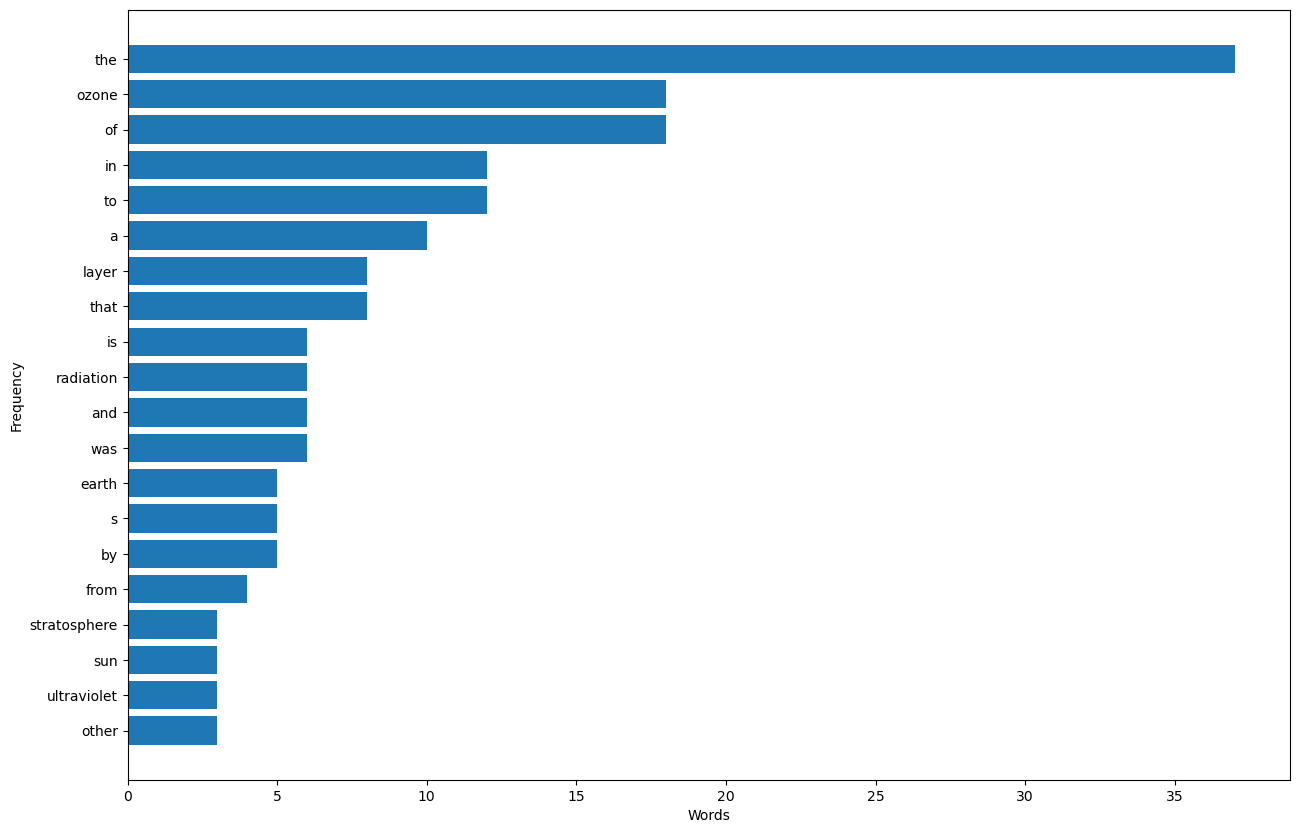

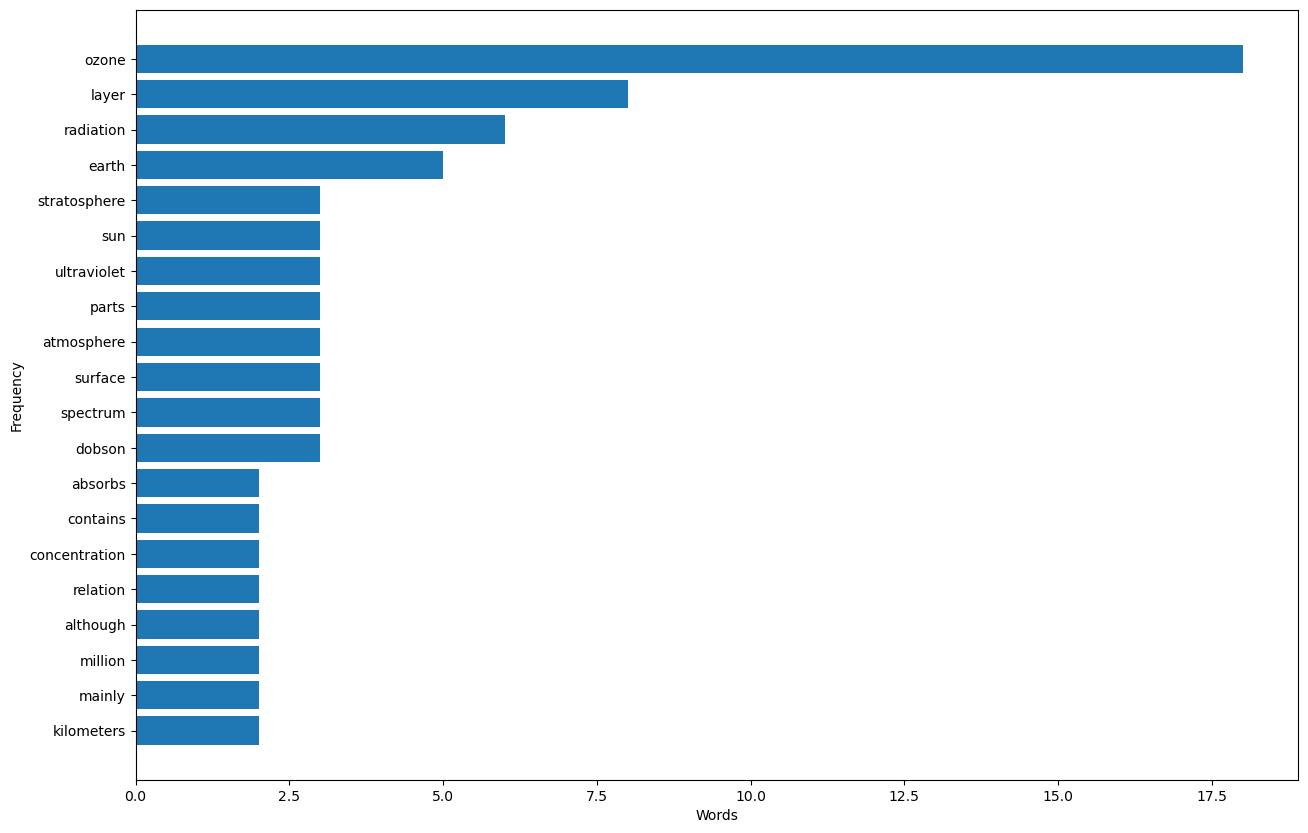

the          37   
ozone        18   
of           18   
in           12   
to           12   
a            10   
layer        8    
that         8    
is           6    
radiation    6    
and          6    
was          6    
earth        5    
s            5    
by           5    
from         4    
stratosphere   3    
sun          3    
ultraviolet   3    
other        3    
[('ozone', 18), ('layer', 8), ('shield', 1), ('region', 1), ('earth', 5), ('stratosphere', 3), ('absorbs', 2), ('most', 1), ('sun', 3), ('ultraviolet', 3), ('radiation', 6), ('contains', 2), ('high', 1), ('concentration', 2), ('o', 1), ('relation', 2), ('parts', 3), ('atmosphere', 3), ('although', 2), ('still', 1), ('small', 1), ('gases', 1), ('less', 1), ('than', 1), ('million', 2), ('while', 1), ('average', 1), ('whole', 1), ('mainly', 2), ('found', 1), ('lower', 1), ('portion', 1), ('approximately', 1), ('kilometers', 2), ('mi', 1), ('above', 2), ('thickness', 1), ('varies', 1), ('seasonally', 1), ('geograp

In [1]:
import requests
import re
import matplotlib.pyplot as plt

def get_content(article_name):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "exsectionformat": "wiki",
        "titles": article_name,
        "exintro": True,
        "explaintext": True
    }
    
    response = requests.get(url, params=params)
    return response.json()

def clean_text(article_text):
    clean_text = re.sub(r'<[^>]+>', '', article_text)
    clean_text = re.sub(r'\n+', '\n', clean_text)
    clean_text = clean_text.replace('\xa0', ' ')
    clean_text = clean_text.strip()
    clean_text = re.sub(r'[^a-zA-Z\s]+', ' ', clean_text)
    clean_text = re.sub(r'\n?\[edit\]\n?', '\n', clean_text)
    clean_text = re.sub(r'^.*Contents\n\n', '', clean_text)
    clean_text = re.sub(r'^.*See also\n\n', '', clean_text)
    clean_text = re.sub(r'^.*References\n\n', '', clean_text)
    clean_text = re.sub(r'^.*Further reading\n\n', '', clean_text)
    clean_text = re.sub(r'^.*External links\n\n', '', clean_text)
    return clean_text

def tokenize(content):
    return re.findall(r'\b\w+\b', content)

def lower_collection(collection):
    return [word.lower() for word in collection]

def count_frequency(lowercase_collection):
    count_frequency_dict = {}
    count_already = []
    for word in lowercase_collection:
        if word in count_already:
            count_frequency_dict[word] += 1
        else:
            count_frequency_dict[word] = 1
            count_already.append(word)
    return count_frequency_dict

def print_most_frequent(frequencies, n):
    valid_freqs = [freq for freq in frequencies if isinstance(freq, tuple) and len(freq) == 2]
    sorted_dict = sorted(valid_freqs, key=lambda x: x[1], reverse=True)
    for i in range(n):
        print(f"{sorted_dict[i][0]:<10}   {sorted_dict[i][1]:<5}")

def plot_most_frequent(frequencies, n):
    valid_freqs = [freq for freq in frequencies if isinstance(freq, tuple) and len(freq) == 2]
    sorted_dict = sorted(valid_freqs, key=lambda x: x[1], reverse=True)
    words = [item[0] for item in sorted_dict[:n]]
    freq = [item[1] for item in sorted_dict[:n]]
    plt.figure(figsize=(15, 10))
    plt.barh(words, freq)
    plt.gca().invert_yaxis()
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.show()

stop_words = ["the", "a", "of", "to", "in", "about", "that", "is", "and", "s", "by", "was", "from", "on", "its", "other", "has", "or", "it", "as", "with", "at", "no", "5", "nm", "per"]
    
def remove_stop_words(frequencies, stop_words):
    valid_freqs = [freq for freq in frequencies if isinstance(freq, tuple) and len(freq) == 2]
    stop_words_set = set(stop_words)
    filtered_collection = [x for x in valid_freqs if x[0] not in stop_words_set]
    return filtered_collection


data = get_content("Ozone layer")
article_text = data["query"]["pages"][next(iter(data["query"]["pages"]))]["extract"]
cleaned_content = clean_text(article_text)
tokenized_content = tokenize(cleaned_content)
lowercased_content = lower_collection(tokenized_content)
count_frequencies = count_frequency(lowercased_content)
list_of_tuples = list(count_frequencies.items())
filtered_result = remove_stop_words(list_of_tuples, stop_words)


plot_most_frequent(list_of_tuples, 20)
plot_most_frequent(filtered_result, 20)
print_most_frequent(list_of_tuples, 20)
print(filtered_result)